In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def read_summary(filename):
    with open(filename, "r") as f:
        d = {"N":[], "s2": [], "s2_variance":[]}
        lines = f.readlines()
        for line in lines:
            s = line.split()
            values = s[1::2]
            d["N"].append(int(values[0]))
            d["s2"].append(float(values[1]))
            d["s2_variance"].append(float(values[2]))
        df = pd.DataFrame.from_dict(d)
        df = df.sort_values('N')
        return df


df_brute = read_summary("sum_brute/data_N.txt")
df_surv = read_summary("sum_surv/data_surv_bias_N.txt")

df_brute["s2_variance"] = np.sqrt(df_brute["s2_variance"])
print(df_brute[df_brute["N"] <= 20].to_latex())


\begin{tabular}{lrrr}
\toprule
{} &   N &         s2 &  s2\_variance \\
\midrule
13 &   1 &   1.000000 &     0.000000 \\
10 &   2 &   2.666033 &     0.000000 \\
12 &   3 &   4.554685 &     0.001414 \\
14 &   4 &   7.039026 &     0.002236 \\
15 &   5 &   9.561712 &     0.003317 \\
19 &   6 &  12.577696 &     0.004359 \\
16 &   7 &  15.560718 &     0.005657 \\
2  &   8 &  19.009377 &     0.006928 \\
5  &   9 &  22.415227 &     0.008367 \\
9  &  10 &  26.238530 &     0.009849 \\
8  &  11 &  30.012461 &     0.011446 \\
6  &  12 &  34.193537 &     0.013077 \\
7  &  13 &  38.310829 &     0.014832 \\
0  &  14 &  42.791144 &     0.016583 \\
1  &  15 &  47.184243 &     0.018466 \\
4  &  16 &  51.989311 &     0.020347 \\
3  &  17 &  56.680949 &     0.022361 \\
17 &  18 &  61.782211 &     0.024393 \\
18 &  19 &  66.749106 &     0.026514 \\
11 &  20 &  72.044398 &     0.028636 \\
\bottomrule
\end{tabular}



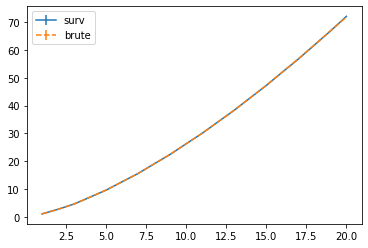

In [17]:
fig, ax = plt.subplots()
Ns = df_surv["N"]
Ns = Ns[Ns <= 20]
s2 = df_surv["s2"]
s2 = s2[Ns.index]
s2_vari = df_surv["s2_variance"]
s2_vari = s2_vari[s2.index]
s2_d = np.sqrt(s2_vari)

ax.errorbar(Ns, s2, yerr=s2_d, label="surv")

Ns = df_brute["N"]
Ns = Ns[Ns <= 20]
s2 = df_brute["s2"]
s2 = s2[Ns.index]
s2_vari = df_brute["s2_variance"]
s2_vari = s2_vari[s2.index]
s2_d = np.sqrt(s2_vari)

ax.errorbar(Ns, s2, yerr=s2_d, linestyle="--",label="brute")
ax.legend()

Text(0, 0.5, '$<S_N^2>$')

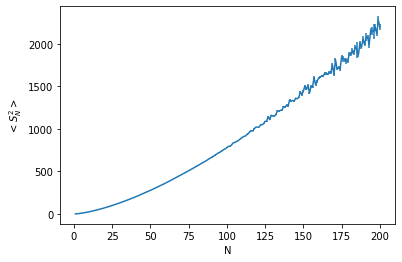

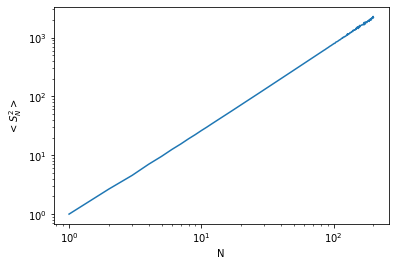

In [47]:
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
Ns = df_surv["N"]
s2 = df_surv["s2"]
s2_vari = df_surv["s2_variance"]
s2_d = np.sqrt(s2_vari)

ax.errorbar(Ns, s2, yerr=s2_d)
#ax.plot(Ns, np.power(Ns, 2.0*mean_nu)*np.exp(mean_offset))
ax.set_xlabel("N")
ax.set_ylabel("$<S_N^2>$")

ax2.plot(Ns, s2)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlabel("N")
ax2.set_ylabel("$<S_N^2>$")

0.7444759842491375
0.017069349518700917


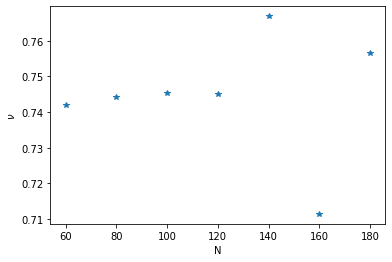

In [53]:
fig3, ax3 = plt.subplots()
intervals = [[40, 80], [60, 100], [80, 120], [100, 140], [120, 160], [140, 180], [160, 200]]
nus = []
offsets = []
mids = []
for interval in intervals:
    df = df_surv[df_surv["N"] >= interval[0]]
    df = df[df["N"] <= interval[1]]

    s2 = df["s2"]
    N = df["N"]

    coef = np.polyfit(np.log(N), np.log(s2), 1)
    nu = coef[0] / 2.0
    nus.append(nu)
    offsets.append(coef[1])
    mids.append((interval[0] + interval[1])/2)
ax3.plot(mids, nus, '*')
ax3.set_xlabel("N")
ax3.set_ylabel(r"$\nu$")
mean_nu = np.mean(nus)
mean_offset = np.mean(offsets)
print(mean_nu)
print(np.std(nus, ddof=1))

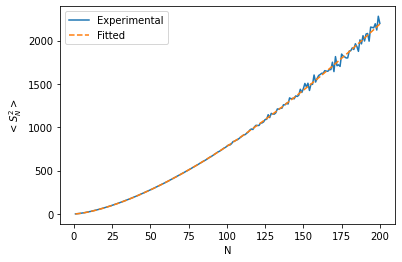

In [51]:
fig, ax = plt.subplots()
Ns = df_surv["N"]
s2 = df_surv["s2"]

ax.plot(Ns, s2, label="Experimental")
ax.plot(Ns, np.power(Ns, 2.0*mean_nu)*np.exp(mean_offset),'--', label="Fitted")
ax.set_xlabel("N")
ax.set_ylabel("$<S_N^2>$")
ax.legend()

In [6]:
df_brute_20 = df_brute[df_brute["N"] <= 20]
df_surv_20 = df_surv[df_surv["N"] <= 20]

print(df_brute_20)
print(df_surv_20)

     N         s2  s2_variance
13   1   1.000000     0.000000
10   2   2.665034     0.000001
12   3   4.550808     0.000006
14   4   7.040680     0.000017
15   5   9.570159     0.000047
19   6  12.570434     0.000089
16   7  15.552718     0.000142
2    8  19.015293     0.000215
5    9  22.426146     0.000460
9   10  26.257410     0.000552
8   11  30.016680     0.000541
6   12  34.171184     0.000838
7   13  38.334969     0.001273
0   14  42.770882     0.000542
1   15  47.254084     0.003645
4   16  52.022453     0.004166
3   17  56.806502     0.004531
17  18  61.763930     0.008529
18  19  66.875121     0.003403
11  20  71.850913     0.022287
      N         s2  s2_variance
114   1   1.000000     0.000000
124   2   2.667002     0.000001
115   3   4.551980     0.000006
146   4   7.042049     0.000006
137   5   9.568786     0.000024
125   6  12.574583     0.000060
136   7  15.536814     0.000053
5     8  19.015754     0.000152
0     9  22.400719     0.000097
15   10  26.261142     0.0002

Text(0, 0.5, '$S_N^2$')

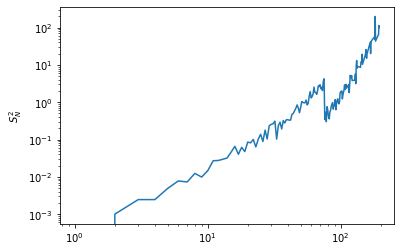

In [7]:
fig, ax = plt.subplots()
Ns = df_surv["N"]
s2 = df_surv["s2"]

ax.plot(Ns, s2_d)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_label("N")
ax.set_ylabel("$S_N^2$")